In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import warnings
warnings.filterwarnings('ignore') # A couple math no-no's in this example, but ignore them

In [2]:
# Define differential equation
def dxdV(V, x):
  dxdV = np.zeros((1,1))
  k1 = 0.125 # lbmol/ft^3/h
  beta = 0.00140
  K = 0.00467
  P = 300 # atm

  yN = 0.225 * (1 - x)
  yH = 3 * yN
  yNH3 = 0.45 * x

  dxdV[0] = k1 * (yN * yH ** 3 - (yNH3 ** 3 / (K ** 2 * P ** 2))) / \
          ((yNH3 * yH ** 0.5 + beta * yH ** 2) ** 1.5) / 0.225

  return dxdV

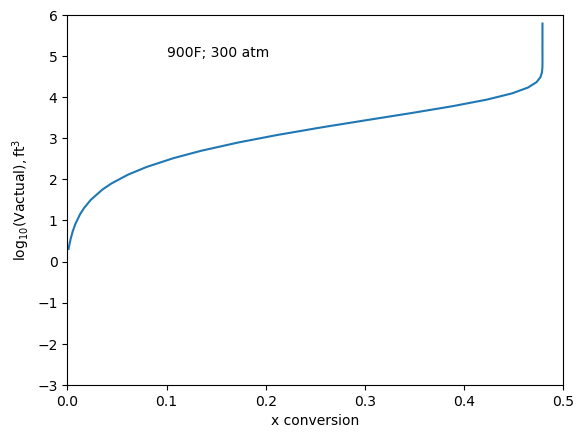

In [4]:
# Initialize
initialconversion = [0]
Vrange = [0, 100] # ft^3

# Solve ODE
results = solve_ivp(dxdV,  Vrange, initialconversion, method = 'RK45', rtol=1e-04)

# Collect results
V, x = results.t, results.y
Vactual = V * 2984 / x
logVactual = np.log10(Vactual)

# Plot results
plt.plot(*x, *logVactual) # Don't worry about the *'s; they are just to "unpack" the arrays
plt.xlim(0, 0.5)
plt.xlabel('x conversion')
plt.ylim(-3, 6)
plt.ylabel(r'$\mathrm{log_{10}(Vactual), ft^3}$') # Formatted using LATEX
plt.text(0.1, 5, '900F; 300 atm')
plt.show()

In [5]:
display(pd.DataFrame([*x, *Vactual*1E-04], index=['x', 'Vactual/10000']).T)

,x,Vactual/10000
0,0.000000,NaN
1,0.001201,0.000202
2,0.001879,0.000247
3,0.003351,0.000360
4,0.005437,0.000548
5,0.008182,0.000837
6,0.012808,0.001419
7,0.016908,0.002023
8,0.023589,0.003172
9,0.035353,0.005663
